In [1]:
import numpy as np

results = np.load('coverage_results.npy')

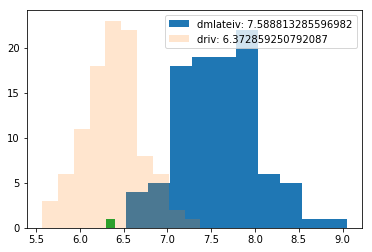

In [2]:
import matplotlib.pyplot as plt

plt.hist(results[:, 1], label='dmlateiv: {}'.format(np.mean(results[:, 1])))
plt.hist(results[:, 4], label='driv: {}'.format(np.mean(results[:, 4])), alpha=.2)
plt.hist(np.mean(results[:, 0]))
plt.legend()
plt.show()

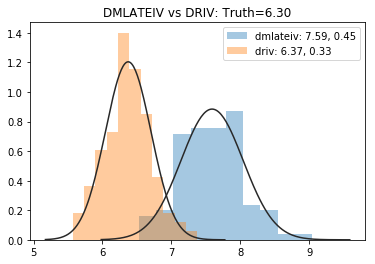

In [13]:
import seaborn as sns
from scipy.stats import norm

(mu, sigma) = norm.fit(results[:, 1])
sns.distplot(results[:, 1], fit=norm, kde=False, norm_hist=True, label='dmlateiv: {:.2f}, {:.2f}'.format(mu, sigma))

(mu, sigma) = norm.fit(results[:, 4])
sns.distplot(results[:, 4], fit=norm, kde=False, norm_hist=True, label='driv: {:.2f}, {:.2f}'.format(mu, sigma))
plt.title("DMLATEIV vs DRIV: Truth={:.2f}".format(np.mean(results[:, 0])))
plt.legend()
plt.savefig("cov_exp_1.pdf", dpi=300, bbox_inches='tight')
plt.show()

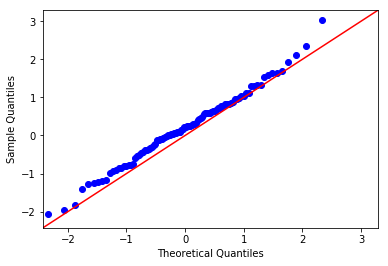

In [14]:
import statsmodels.api as sm
import scipy.stats as stats
std = np.mean(results[:, 6] - results[:, 5])/4
sm.qqplot((results[:, 4] - np.mean(results[:, 0]))/std, line='45')
plt.savefig("cov_exp_2.pdf", dpi=300, bbox_inches='tight')
plt.show()

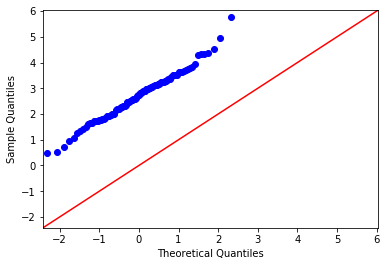

In [15]:
import statsmodels.api as sm
import scipy.stats as stats
std = np.mean(results[:, 3] - results[:, 2])/4
sm.qqplot((results[:, 1] - np.mean(results[:, 0]))/std, line='45')
plt.savefig("cov_exp_3.pdf", dpi=300, bbox_inches='tight')
plt.show()

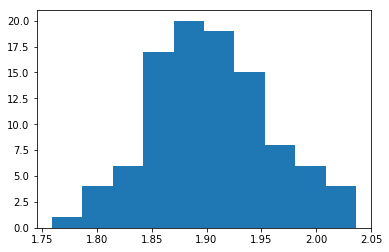

In [16]:
plt.hist(results[:, 3] - results[:, 2])
plt.show()

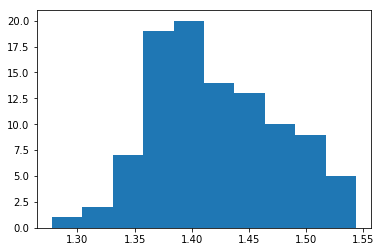

In [17]:
plt.hist(results[:, 6] - results[:, 5])
plt.show()

In [18]:
print("Coverage DMLATE: {:.3f}".format(np.mean((results[:, 0] >= results[:, 2]) & (results[:, 0] <= results[:, 3]))))
print("Coverage DRIV: {:.3f}".format(np.mean((results[:, 0] >= results[:, 5]) & (results[:, 0] <= results[:, 6]))))

Coverage DMLATE: 0.260
Coverage DRIV: 0.940
